In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import os 
os.chdir("/Users/usuario/Downloads")

In [40]:
df=pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [42]:
#Exploracion de datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [46]:
cdf=df[{"ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"}]
cdf.head(9)

C:\Users\usuario\AppData\Local\Temp\ipykernel_14036\1673293667.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cdf=df[{"ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"}]


,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.4,8.6,4,200
1,3.5,11.2,6,263
2,2.0,9.9,4,232
3,2.0,10.3,4,242
4,2.0,9.8,4,230
5,2.0,9.8,4,231
6,3.0,11.0,6,256
7,3.0,11.2,6,261
8,2.0,8.7,4,205


C:\Users\usuario\AppData\Local\Temp\ipykernel_14036\3403719681.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  viz=cdf[{"ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"}]


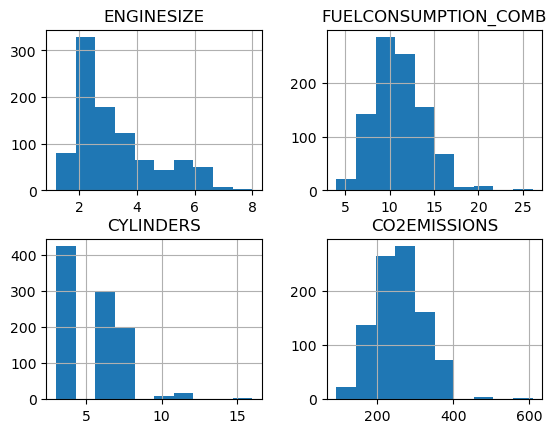

In [50]:
viz=cdf[{"ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"}]
viz.hist()
plt.show()

Text(0, 0.5, 'CO2EMISSIONS')

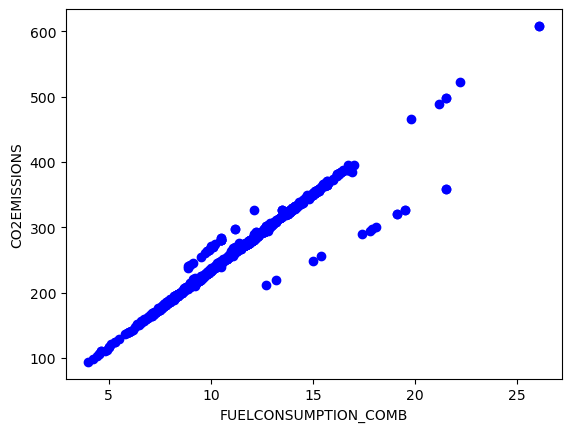

In [52]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

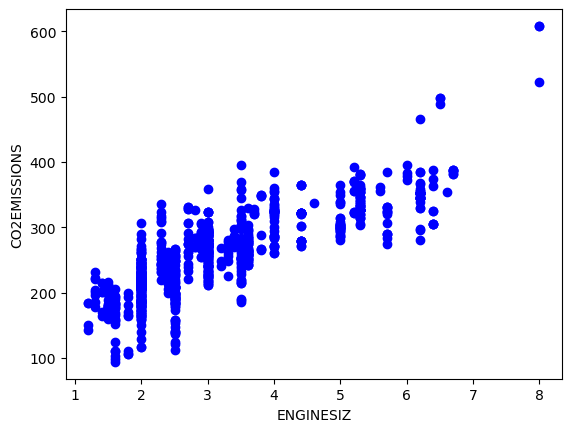

In [54]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("ENGINESIZ")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

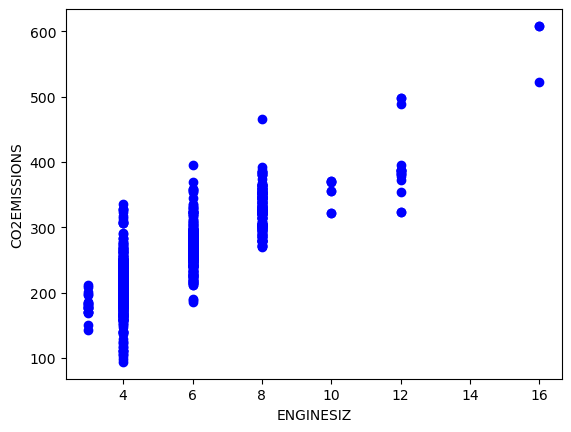

In [56]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("ENGINESIZ")
plt.ylabel("CO2EMISSIONS")

In [60]:
msk=np.random.rand(len(df)) <= 0.80
msk

array([ True, False, False,  True, False,  True, False, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [62]:
train=cdf[msk]
train

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.4,8.6,4,200
3,2.0,10.3,4,242
5,2.0,9.8,4,231
9,2.0,9.2,4,217
10,2.9,11.6,6,271
...,...,...,...,...
938,2.0,9.5,4,222
940,2.0,9.4,4,219
941,2.0,9.4,4,219
942,2.0,9.9,4,232


In [64]:
test=cdf[~msk]
test

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
1,3.5,11.2,6,263
2,2.0,9.9,4,232
4,2.0,9.8,4,230
6,3.0,11.0,6,256
7,3.0,11.2,6,261
...,...,...,...,...
927,2.0,7.9,4,186
931,2.0,9.4,4,222
932,2.0,9.8,4,229
939,2.0,9.3,4,217


Text(0, 0.5, 'CO2EMISSIONS')

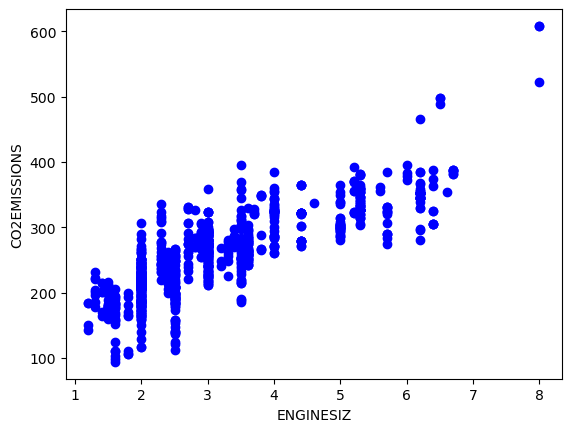

In [66]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("ENGINESIZ")
plt.ylabel("CO2EMISSIONS")

In [76]:
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression()

In [78]:
print("Coeficiente de pendiente",regr.coef_)
print("Coeficiente de intercepto",regr.intercept_)

Coeficiente de pendiente [[39.63930781]]
Coeficiente de intercepto [131.92374014]


Text(0, 0.5, 'Emission')

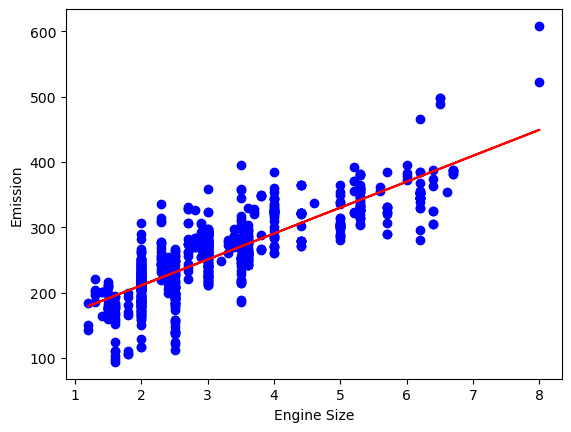

In [80]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],"-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [84]:
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat=regr.predict(test_x)

In [86]:
test_y_hat

array([[270.66131746],
       [211.20235575],
       [211.20235575],
       [250.84166356],
       [250.84166356],
       [211.20235575],
       [211.20235575],
       [338.04814073],
       [211.20235575],
       [250.84166356],
       [211.20235575],
       [211.20235575],
       [338.04814073],
       [338.04814073],
       [290.48097137],
       [211.20235575],
       [250.84166356],
       [306.33669449],
       [306.33669449],
       [306.33669449],
       [211.20235575],
       [211.20235575],
       [250.84166356],
       [250.84166356],
       [250.84166356],
       [306.33669449],
       [211.20235575],
       [449.03820259],
       [187.41877107],
       [179.49090951],
       [211.20235575],
       [211.20235575],
       [211.20235575],
       [274.62524824],
       [211.20235575],
       [211.20235575],
       [274.62524824],
       [377.68744854],
       [274.62524824],
       [377.68744854],
       [191.38270185],
       [211.20235575],
       [342.01207151],
       [342

In [88]:
test_y

array([[263],
       [232],
       [230],
       [256],
       [261],
       [205],
       [218],
       [324],
       [178],
       [248],
       [233],
       [217],
       [322],
       [356],
       [287],
       [195],
       [301],
       [322],
       [322],
       [279],
       [213],
       [207],
       [323],
       [323],
       [241],
       [302],
       [199],
       [608],
       [214],
       [184],
       [222],
       [225],
       [237],
       [263],
       [239],
       [222],
       [251],
       [349],
       [263],
       [297],
       [198],
       [213],
       [341],
       [321],
       [366],
       [170],
       [336],
       [178],
       [214],
       [289],
       [305],
       [359],
       [305],
       [258],
       [265],
       [291],
       [323],
       [331],
       [317],
       [317],
       [326],
       [225],
       [249],
       [298],
       [256],
       [304],
       [295],
       [370],
       [238],
       [231],
       [237],
      

In [98]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_hat))

Mean Absolute Error: 28.30
Residual sum of squares (MSE): 1372.14
R2-score: 0.63


In [100]:
cdf=df[{"ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"}]
cdf.head(9)

C:\Users\usuario\AppData\Local\Temp\ipykernel_14036\2163891048.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cdf=df[{"ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"}]


,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CYLINDERS,FUELCONSUMPTION_HWY,ENGINESIZE,CO2EMISSIONS
0,9.9,8.6,4,7.0,2.4,200
1,12.6,11.2,6,9.4,3.5,263
2,11.0,9.9,4,8.6,2.0,232
3,11.3,10.3,4,9.1,2.0,242
4,11.2,9.8,4,8.0,2.0,230
5,11.3,9.8,4,8.1,2.0,231
6,12.3,11.0,6,9.4,3.0,256
7,12.3,11.2,6,9.8,3.0,261
8,10.0,8.7,4,7.2,2.0,205


In [102]:
x=np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)
print("Coeficientes de variables independientes",regr.coef_)
print("Coeficiente de intercepto",regr.intercept_)

Coeficientes de variables independientes [[ 0.4533665   2.45288054 20.63320816]]
Coeficiente de intercepto [15.63136216]


In [ ]:
CO2EMISSION= 15.63136216 + 0.4533665(ENGINESIZE) + 2.45288054(CYLINDERS) + 20.63320816(FUELCONSUMPTION_COMB)

In [104]:
y_hat=regr.predict(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
x=np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(test[["CO2EMISSIONS"]])

C:\Users\usuario\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [106]:
#Evaluacion de tipos de errores
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y)**2))
print("R2-score: %.2f" % r2_score(y_hat, y))

Mean Absolute Error: 7.37
Residual sum of squares (MSE): 418.90
R2-score: 0.89


In [2]:
def pol_grado(x,Beta_0, Beta_1):
    y=Beta_0 + Beta_1 * x
    return y

In [7]:
x=np.arange(-5.0,5.0,0.1)
y= pol_grado(x,3,2)
y_noise= np.random.normal(0,1,size=x.size)
ydata=y+y_noise

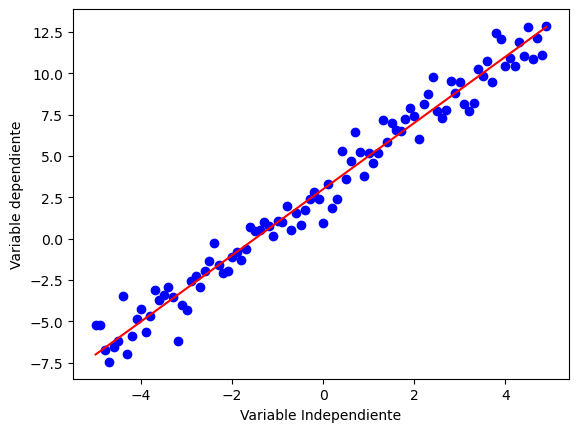

In [10]:
plt.plot(x,ydata,"bo")
plt.plot(x,y,"r")
plt.ylabel("Variable dependiente")
plt.xlabel("Variable Independiente")
plt.show()

In [14]:
popt,pcov = curve_fit(pol_grado,x,ydata)

In [16]:
print("beta_0 = ",popt[0],"beta_1 = ",popt[1])

beta_0 =  2.994116982646917 beta_1 =  1.975860585548672


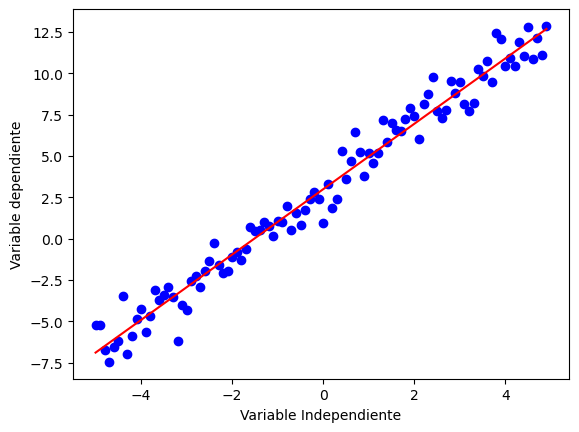

In [20]:
y_ajust=pol_grado(x,popt[0],popt[1])
plt.plot(x,ydata,"bo")
plt.plot(x,y_ajust,"r")
plt.ylabel("Variable dependiente")
plt.xlabel("Variable Independiente")
plt.show()

In [22]:
##Modelo polinomial de tercer grado
def pol_grado3(x,Beta_0, Beta_1,Beta_2,Beta_3):
    y=Beta_0 + Beta_1*x + Beta_2*(x**2) + Beta_3*(x**3)
    return y

In [24]:
x=np.arange(-5.0,5.0,0.1)
y= pol_grado3(x,3,1,1,1)
y_noise= 20 * np.random.normal(0,1,size=x.size)
ydata=y+y_noise

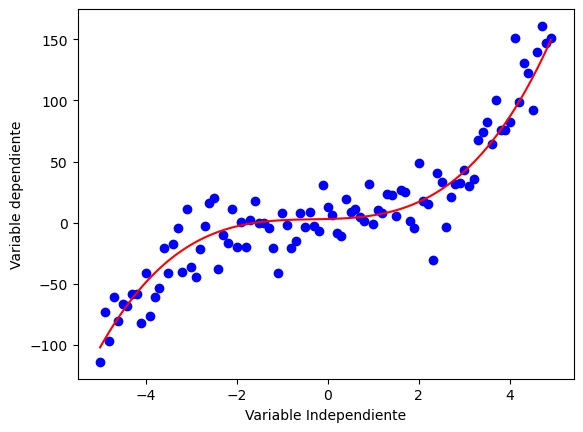

In [26]:
plt.plot(x,ydata,"bo")
plt.plot(x,y,"r")
plt.ylabel("Variable dependiente")
plt.xlabel("Variable Independiente")
plt.show()

In [30]:
msk=np.random.rand(len(x))<= 0.8
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True])

In [36]:
train_x=x[msk]
test_x=x[~msk]
train_y=ydata[msk]
test_y=ydata[~msk]

In [38]:
popt,pcov = curve_fit(pol_grado3,train_x,train_y)

In [40]:
print("beta_0 = ",popt[0],"beta_1 = ",popt[1],"beta_2 = ",popt[2],"beta_3 = ",popt[3])

beta_0 =  -1.0082122463333194 beta_1 =  3.310311594697833 beta_2 =  1.373403654866331 beta_3 =  0.9401569142597643


In [42]:
#Prediccion
y_hat = pol_grado3(test_x,*popt)

In [46]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(y_hat, test_y))

Mean Absolute Error: 14.02
Residual sum of squares (MSE): 292.19
R2-score: 0.89


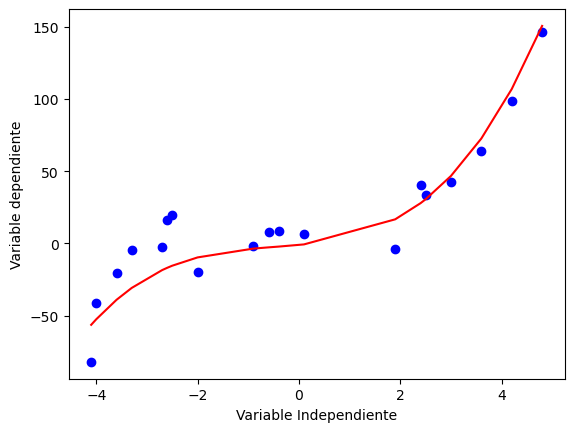

In [48]:
plt.plot(test_x,test_y,"bo")
plt.plot(test_x,y_hat,"r")
plt.ylabel("Variable dependiente")
plt.xlabel("Variable Independiente")
plt.show()

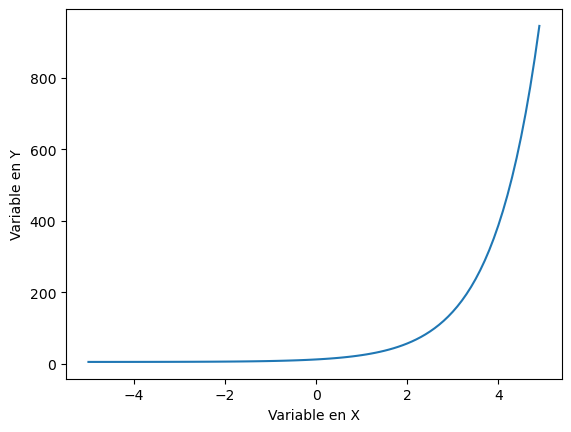

In [50]:
#Modelo exponensial
X=np.arange(-5.0,5.0,0.1)
Y= 5+7*(np.exp(X))

plt.plot(X,Y)
plt.ylabel("Variable en Y")
plt.xlabel("Variable en X")
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_11936\4061881991.py:3: RuntimeWarning: invalid value encountered in log
  Y= 2+6*(np.log(X))


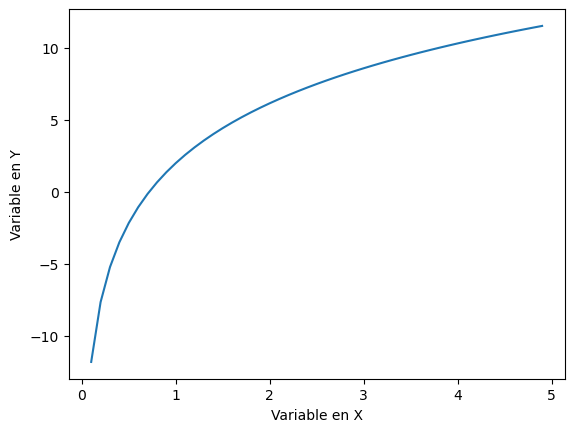

In [52]:
#Modelo logaritmico
X=np.arange(-5.0,5.0,0.1)
Y= 2+6*(np.log(X))

plt.plot(X,Y)
plt.ylabel("Variable en Y")
plt.xlabel("Variable en X")
plt.show()

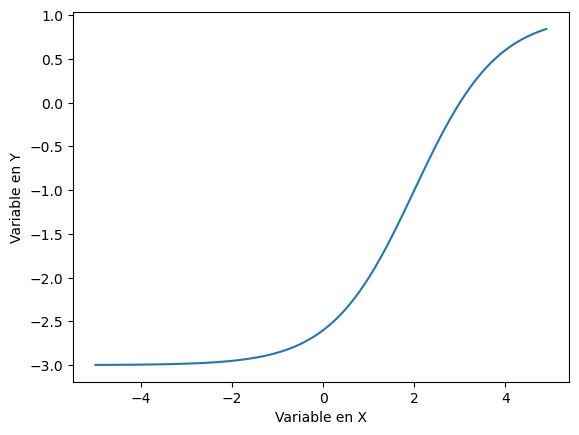

In [54]:
#Modelo sigmoidal
X=np.arange(-5.0,5.0,0.1)
Y= 1-4/(1+np.power(3,X-2))

plt.plot(X,Y)
plt.ylabel("Variable en Y")
plt.xlabel("Variable en X")
plt.show()